Using the same dataset as last time, I'll create a Linear Model as well as perform some feature engineering to try to minimize model prediction error

In [21]:
# dependencies
import pandas as pd
import seaborn as sns
import locale
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
%matplotlib inline

In [2]:
df = pd.read_csv("data/nyc crime.csv")

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN


## Preprocessing

Convert string numbers into their integer form

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
City                                    348 non-null object
Population                              348 non-null object
Violent crime                           348 non-null object
Murder and nonnegligent manslaughter    348 non-null int64
Rape                                    348 non-null object
Robbery                                 348 non-null object
Aggravated assault                      348 non-null object
Property crime                          348 non-null object
Burglary                                348 non-null object
Larceny-theft                           348 non-null object
Motor vehicle theft                     348 non-null object
Arson                                   187 non-null float64
dtypes: float64(1), int64(1), object(10)
memory usage: 32.7+ KB


In [5]:
mutable_df = df.copy()

In [6]:
mutable_df = mutable_df.rename(columns={"Murder and nonnegligent manslaughter": "Murder"})

In [ ]:
# drop na values
mutable_df = mutable_df.dropna()

In [7]:
mutable_df.head()

,City,Population,Violent crime,Murder,Rape,Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,3,4,16,223,53,165,5,NaN


In [8]:
convert_columns = ["Population",
                   "Violent crime",
                   "Rape",
                   "Robbery",
                   "Aggravated assault",
                   "Property crime",
                   "Burglary",
                   "Larceny-theft",
                   "Motor vehicle theft"]

In [9]:
for column in convert_columns:
    mutable_df[column] = mutable_df[column].apply(lambda value: locale.atoi(str(value)))

In [10]:
mutable_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
City                   348 non-null object
Population             348 non-null int64
Violent crime          348 non-null int64
Murder                 348 non-null int64
Rape                   348 non-null int64
Robbery                348 non-null int64
Aggravated assault     348 non-null int64
Property crime         348 non-null int64
Burglary               348 non-null int64
Larceny-theft          348 non-null int64
Motor vehicle theft    348 non-null int64
Arson                  187 non-null float64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


In [11]:
# define our targets, and features
features = mutable_df[["Rape", "Arson", "Robbery", "Aggravated assault", "Motor vehicle theft"]]
target = mutable_df[["Property crime"]]

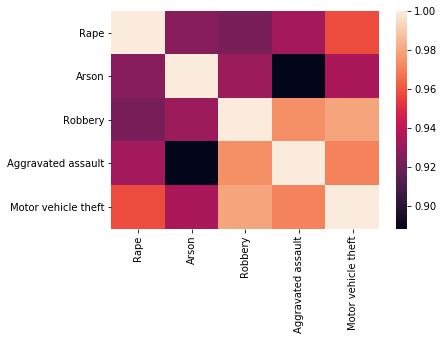

In [12]:
# show a correaltion coeff for the features, so we can see which are correlated, and which are not
feature_correlations = features.corr()

sns.heatmap(feature_correlations)

## Dealing with Multicollinearity

From the heatmap above we can see that almost all of our features are highly correlated. For our sake, let's plot some of the features against each other.


We have a high amount of multicollinearity, but that might not actually matter. If we're only interested in the ability to predict Property Crime, that should be sufficient. If we need to understand the most influential components, we'll have to think how to do that

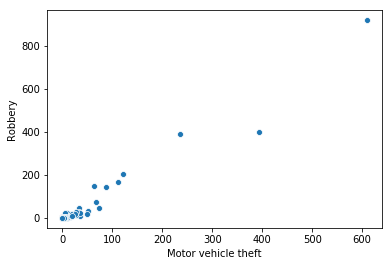

In [13]:
sns.scatterplot(x=features["Motor vehicle theft"], y=features["Robbery"])

The heatmap showed us we the correlation between two features, but did not show us the "correlation" between one feature, and all the others. We'll use the Variance Inflation Factor metric to identify highly multicollinear features

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# for all features, compute the VIF, and show what feature it's associated to

vif_frame = pd.DataFrame()
vif_frame["VIF"] = [VIF(features.values, index) for index in range(features.shape[1])]
vif_frame["feature"] = features.columns

In [15]:
vif_frame

,VIF,feature
0,20.272072,Rape
1,13.932755,Arson
2,53.212344,Robbery
3,34.175277,Aggravated assault
4,51.493528,Motor vehicle theft


#### Conclusion

Since the goal of this notebook is to make a linear model that has a high accuracy rate in predicting property crime, we don't really need to worry about these rediculously high VIF scores. We'll continue as before and see what we can do

## Creating the Model


For this, we'll create a LinearRegression model using the features we defined above, and the target we defined above. We'll split our data into a train test set, with a 30% test split. This should help with identifying potential training overfitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)

In [17]:
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# show the coefficients and intercept
coeffs = model.coef_
intercept = model.intercept_

print("Coefficients: {}".format(coeffs))
print("Intercept: {}".format(intercept))

Coefficients: [[ -9.93168409 -68.07234101 -10.92198114   8.00515607  25.82110292]]
Intercept: [93.24627989]


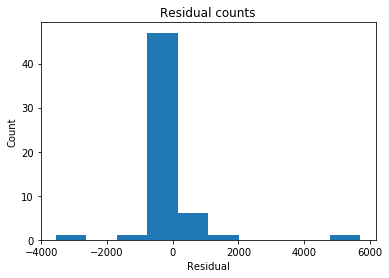

In [24]:
# compute the residual, and plot the distribution
predicted = model.predict(X_test).ravel()
actual = y_test["Property crime"]

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()